In [22]:
from qiskit.quantum_info import DensityMatrix
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.quantum_info import Kraus, SuperOp


shots = 100000
theta=0.3
# Operatori di Kraus: Identità e Hadamard su entrambi i qubit
K0 = np.sqrt(0.9) * np.eye(4)  # Identità con probabilità 90%
H2 = np.array([[0, 0, 0, 1], 
               [0, 0, 1, 0], 
               [0, 1, 0, 0], 
               [1, 0, 0, 0]])   # Hadamard su entrambi i qubit
K1 = np.sqrt(0.1) * H2  # Hadamard con probabilità 10%

# Creazione del canale quantistico multi-qubit
multi_qubit_channel = Kraus([K0, K1])

# Creazione di un circuito quantistico su 2 qubit
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)  # Entanglement con una CNOT
qc.cx(1, 0)  # Entanglement con una CNOT
qc.cx(0, 1)  # Entanglement con una CNOT
qc.rz(theta, 0)
qc.rz(theta, 1)
qc.rx(theta, 1)

rho = DensityMatrix(qc)
rho.draw('latex', prefix='\\rho')




<IPython.core.display.Latex object>

In [23]:
import qiskit.quantum_info as qi
# Applicazione del canale quantistico collettivo
qc.append(SuperOp(multi_qubit_channel), [0, 1])


rho_AB = qi.DensityMatrix.from_instruction(qc)
rho_AB.draw('latex', prefix='\\phi(\\rho) = ')



<IPython.core.display.Latex object>

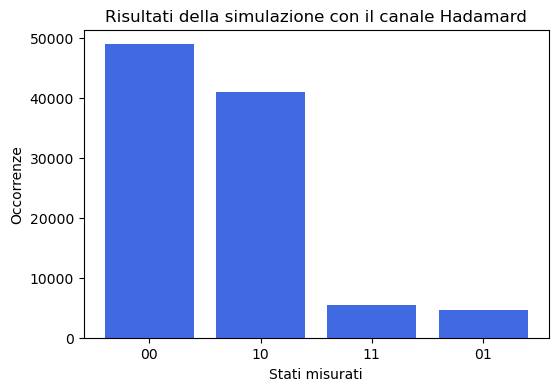

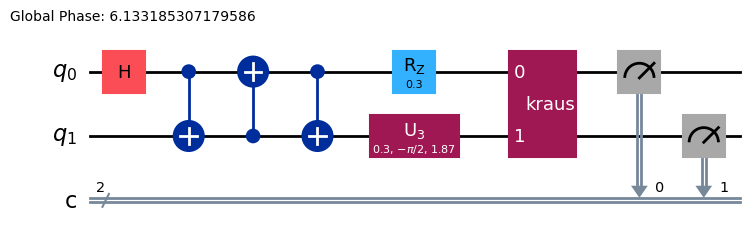

In [24]:
# Misura dei qubit
qc.measure([0, 1], [0, 1])


# Simulazione
simulator = Aer.get_backend('aer_simulator')
qc = transpile(qc, simulator)
result = simulator.run(qc, shots=shots ).result()

counts = result.get_counts()

# Plot dei risultati
plt.figure(figsize=(6,4))
plt.bar(counts.keys(), counts.values(), color='royalblue')
plt.xlabel("Stati misurati")
plt.ylabel("Occorrenze")
plt.title("Risultati della simulazione con il canale Hadamard")
plt.show()
qc.draw(output='mpl')



In [25]:

# Definizione della matrice Z
Z = np.array([[1, 0,  0,  0], 
              [0, -1, 0,  0], 
              [0, 0, -1,  0], 
              [0, 0,  0,  1]])

print("Matrice Z:\n", Z)

print("\nMatrice densità rho:\n", rho_AB)

# Calcoliamo il prodotto rho * Z
rho_Z = np.dot(rho_AB, Z)

print("\nProdotto rho * Z:\n", rho_Z)

# Calcoliamo la traccia di rho_Z
trace_rho_Z = np.trace(rho_Z)

print("\nTraccia di rho * Z:", trace_rho_Z)

Matrice Z:
 [[ 1  0  0  0]
 [ 0 -1  0  0]
 [ 0  0 -1  0]
 [ 0  0  0  1]]

Matrice densità rho:
 DensityMatrix([[4.89299487e-01+0.00000000e+00j,
                0.00000000e+00+0.00000000e+00j,
                4.29901420e-01-1.27044557e-01j,
                0.00000000e+00+0.00000000e+00j],
               [0.00000000e+00+0.00000000e+00j,
                4.56333904e-02+0.00000000e+00j,
                1.93746982e-33+0.00000000e+00j,
                4.77668245e-02+1.41160618e-02j],
               [4.29901420e-01+1.27044557e-01j,
                1.93746982e-33+0.00000000e+00j,
                4.10700513e-01+0.00000000e+00j,
                2.02804963e-33+5.99329647e-34j],
               [0.00000000e+00+0.00000000e+00j,
                4.77668245e-02-1.41160618e-02j,
                2.02804963e-33-5.99329647e-34j,
                5.43666096e-02+0.00000000e+00j]],
              dims=(2, 2))

Prodotto rho * Z:
 [[ 4.89299487e-01+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  -4.29901420e-01+